The first notebook contains the initial steps in constructing the calibration module; i.e. general data exploration after an initial Sage run on the PXD001468 subset file. In addition, a first attempt at linear regression (LR) calibration is performed and the model is applied on the original (uncalibrated) mzML file.


In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
tsv_file_path = './uniprotkb_Human_AND_model_organism_9606_2023_10_31.PXD001468.results.sage.tsv'
df = pd.read_csv(tsv_file_path, sep='\t')
df.head(5)

In [17]:
dimensions = df.shape
print(dimensions)

(46108, 36)


In [18]:
df2 = df[df["spectrum_q"] < 0.01]
dimensions2 = df2.shape
print(dimensions2)
df2.head(5)

(25591, 36)


,peptide,proteins,num_proteins,filename,scannr,rank,label,expmass,calcmass,charge,peptide_len,missed_cleavages,isotope_error,precursor_ppm,fragment_ppm,hyperscore,delta_next,delta_best,rt,aligned_rt,predicted_rt,delta_rt_model,matched_peaks,longest_b,longest_y,longest_y_pct,matched_intensity_pct,scored_candidates,poisson,sage_discriminant_score,posterior_error,spectrum_q,peptide_q,protein_q,ms1_intensity,ms2_intensity
0,AMADPEVQQIMSDPAM[+15.9949]R,tr|V9HW72|V9HW72_HUMAN,1,b1948_293T_proteinID_12B_QE3_122212.mzML,controllerType=0 controllerNumber=1 scan=52137,1,1,1904.8496,1904.8430,2,17,0,0.0,3.460540,2.086644,74.331097,19.641480,0.0,142.37796,0.684509,0.598838,0.085672,24,12,12,0.705882,38.319496,12,-11.079516,4.004227,-324.0,0.002681,0.004826,0.008468,324433760.0,18802004.0
1,AM[+15.9949]ADPEVQQIMSDPAM[+15.9949]R,tr|V9HW72|V9HW72_HUMAN,1,b1948_293T_proteinID_12B_QE3_122212.mzML,controllerType=0 controllerNumber=1 scan=43192,1,1,1920.8435,1920.8379,2,17,0,0.0,2.923321,2.441208,69.276393,17.127591,0.0,122.47926,0.588843,0.603447,0.014604,23,10,12,0.705882,51.741932,12,-9.318639,3.931856,-324.0,0.002681,0.004826,0.008468,58996220.0,4950993.5
2,VGNGFEEGTTQGPLINEK,tr|X5DNC0|X5DNC0_HUMAN,1,b1948_293T_proteinID_12B_QE3_122212.mzML,controllerType=0 controllerNumber=1 scan=39017,1,1,1888.9207,1888.9167,2,18,0,0.0,2.067982,2.366664,73.226700,46.688128,0.0,113.33001,0.544856,0.546196,0.001340,24,11,12,0.666667,50.676030,24,-17.006086,3.777303,-324.0,0.002681,0.004826,0.008468,317890100.0,15707142.0
3,SC[+57.0214]DDEDWQPGLVTPR,tr|V9GYX6|V9GYX6_HUMAN,1,b1948_293T_proteinID_12B_QE3_122212.mzML,controllerType=0 controllerNumber=1 scan=46485,1,1,1773.7666,1773.7627,2,15,0,0.0,2.202237,2.743206,51.644550,51.644550,0.0,129.73146,0.623709,0.560582,0.063127,17,5,12,0.800000,73.020770,1,-1.760110,3.655011,-324.0,0.002681,0.004826,0.008468,9428209.0,766222.0
4,AMADPEVQQIMSDPAM[+15.9949]R,tr|V9HW72|V9HW72_HUMAN,1,b1948_293T_proteinID_12B_QE3_122212.mzML,controllerType=0 controllerNumber=1 scan=52426,1,1,1904.8522,1904.8430,2,17,0,0.0,4.806302,1.754573,63.904430,12.263916,0.0,143.05637,0.687771,0.598838,0.088933,21,9,12,0.705882,31.141436,10,-8.294859,3.538570,-324.0,0.002681,0.004826,0.008468,76771940.0,4060421.5


In [19]:
df2['exp_m/z'] = df2['expmass'] / df2['charge']
df2['calc_m/z'] = df2['calcmass'] / df2['charge']
df2['m/z_difference'] = df2['calc_m/z'] - df2['exp_m/z']
df2.head(5)

/tmp/ipykernel_2962898/2762163678.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['exp_m/z'] = df2['expmass'] / df2['charge']
/tmp/ipykernel_2962898/2762163678.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['calc_m/z'] = df2['calcmass'] / df2['charge']
/tmp/ipykernel_2962898/2762163678.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

,peptide,proteins,num_proteins,filename,scannr,rank,label,expmass,calcmass,charge,peptide_len,missed_cleavages,isotope_error,precursor_ppm,fragment_ppm,hyperscore,delta_next,delta_best,rt,aligned_rt,predicted_rt,delta_rt_model,matched_peaks,longest_b,longest_y,longest_y_pct,matched_intensity_pct,scored_candidates,poisson,sage_discriminant_score,posterior_error,spectrum_q,peptide_q,protein_q,ms1_intensity,ms2_intensity,exp_m/z,calc_m/z,m/z_difference
0,AMADPEVQQIMSDPAM[+15.9949]R,tr|V9HW72|V9HW72_HUMAN,1,b1948_293T_proteinID_12B_QE3_122212.mzML,controllerType=0 controllerNumber=1 scan=52137,1,1,1904.8496,1904.8430,2,17,0,0.0,3.460540,2.086644,74.331097,19.641480,0.0,142.37796,0.684509,0.598838,0.085672,24,12,12,0.705882,38.319496,12,-11.079516,4.004227,-324.0,0.002681,0.004826,0.008468,324433760.0,18802004.0,952.42480,952.42150,-0.00330
1,AM[+15.9949]ADPEVQQIMSDPAM[+15.9949]R,tr|V9HW72|V9HW72_HUMAN,1,b1948_293T_proteinID_12B_QE3_122212.mzML,controllerType=0 controllerNumber=1 scan=43192,1,1,1920.8435,1920.8379,2,17,0,0.0,2.923321,2.441208,69.276393,17.127591,0.0,122.47926,0.588843,0.603447,0.014604,23,10,12,0.705882,51.741932,12,-9.318639,3.931856,-324.0,0.002681,0.004826,0.008468,58996220.0,4950993.5,960.42175,960.41895,-0.00280
2,VGNGFEEGTTQGPLINEK,tr|X5DNC0|X5DNC0_HUMAN,1,b1948_293T_proteinID_12B_QE3_122212.mzML,controllerType=0 controllerNumber=1 scan=39017,1,1,1888.9207,1888.9167,2,18,0,0.0,2.067982,2.366664,73.226700,46.688128,0.0,113.33001,0.544856,0.546196,0.001340,24,11,12,0.666667,50.676030,24,-17.006086,3.777303,-324.0,0.002681,0.004826,0.008468,317890100.0,15707142.0,944.46035,944.45835,-0.00200
3,SC[+57.0214]DDEDWQPGLVTPR,tr|V9GYX6|V9GYX6_HUMAN,1,b1948_293T_proteinID_12B_QE3_122212.mzML,controllerType=0 controllerNumber=1 scan=46485,1,1,1773.7666,1773.7627,2,15,0,0.0,2.202237,2.743206,51.644550,51.644550,0.0,129.73146,0.623709,0.560582,0.063127,17,5,12,0.800000,73.020770,1,-1.760110,3.655011,-324.0,0.002681,0.004826,0.008468,9428209.0,766222.0,886.88330,886.88135,-0.00195
4,AMADPEVQQIMSDPAM[+15.9949]R,tr|V9HW72|V9HW72_HUMAN,1,b1948_293T_proteinID_12B_QE3_122212.mzML,controllerType=0 controllerNumber=1 scan=52426,1,1,1904.8522,1904.8430,2,17,0,0.0,4.806302,1.754573,63.904430,12.263916,0.0,143.05637,0.687771,0.598838,0.088933,21,9,12,0.705882,31.141436,10,-8.294859,3.538570,-324.0,0.002681,0.004826,0.008468,76771940.0,4060421.5,952.42610,952.42150,-0.00460


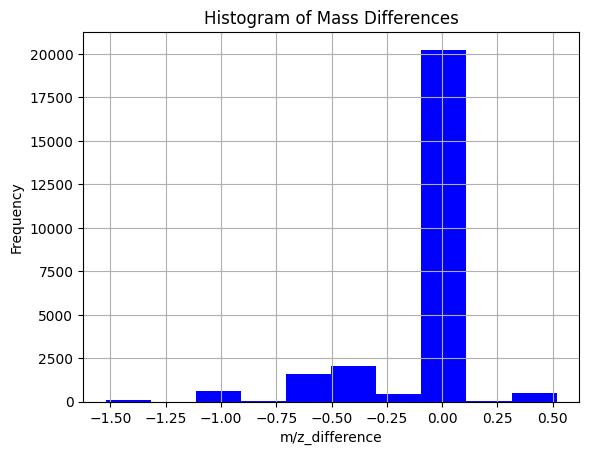

In [20]:
import matplotlib.pyplot as plt
plt.hist(df2['m/z_difference'], bins=10, color='blue')
plt.xlabel('m/z_difference')
plt.ylabel('Frequency')
plt.title('Histogram of Mass Differences')
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Retention Time vs. mass difference')

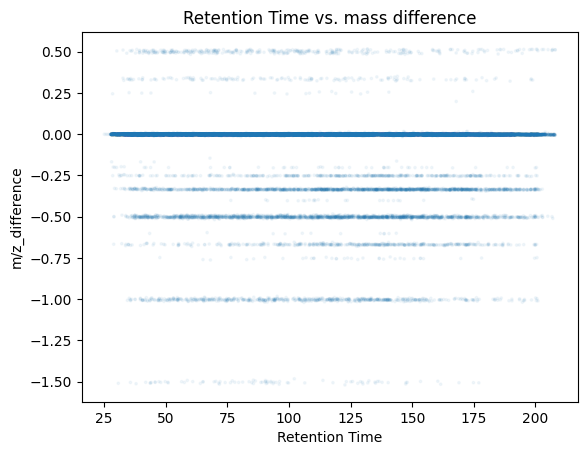

In [21]:
plt.scatter(df2['rt'], df2['m/z_difference'], marker='o', linestyle='', alpha=0.05, s=3)
plt.xlabel('Retention Time')
plt.ylabel('m/z_difference')
plt.title('Retention Time vs. mass difference')

Text(0.5, 1.0, 'Retention Time vs. mass difference')

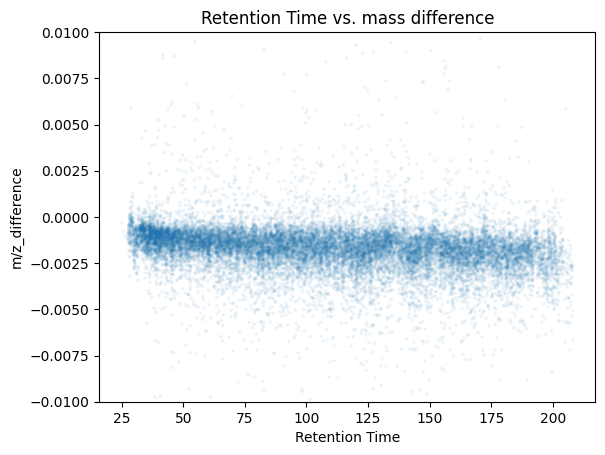

In [22]:
import matplotlib.pyplot as plt
plt.scatter(df2['rt'], df2['m/z_difference'], marker='o', linestyle='', alpha=0.05, s=3)
plt.ylim(-0.01,0.01)
plt.xlabel('Retention Time')
plt.ylabel('m/z_difference')
plt.title('Retention Time vs. mass difference')

In [23]:
df_error0 = df2[(df2['m/z_difference'] <= 0.1) & (df2['m/z_difference'] >= -0.1)]
print(df_error0.shape)
df_error0.head(5)

(20252, 39)


,peptide,proteins,num_proteins,filename,scannr,rank,label,expmass,calcmass,charge,peptide_len,missed_cleavages,isotope_error,precursor_ppm,fragment_ppm,hyperscore,delta_next,delta_best,rt,aligned_rt,predicted_rt,delta_rt_model,matched_peaks,longest_b,longest_y,longest_y_pct,matched_intensity_pct,scored_candidates,poisson,sage_discriminant_score,posterior_error,spectrum_q,peptide_q,protein_q,ms1_intensity,ms2_intensity,exp_m/z,calc_m/z,m/z_difference
0,AMADPEVQQIMSDPAM[+15.9949]R,tr|V9HW72|V9HW72_HUMAN,1,b1948_293T_proteinID_12B_QE3_122212.mzML,controllerType=0 controllerNumber=1 scan=52137,1,1,1904.8496,1904.8430,2,17,0,0.0,3.460540,2.086644,74.331097,19.641480,0.0,142.37796,0.684509,0.598838,0.085672,24,12,12,0.705882,38.319496,12,-11.079516,4.004227,-324.0,0.002681,0.004826,0.008468,324433760.0,18802004.0,952.42480,952.42150,-0.00330
1,AM[+15.9949]ADPEVQQIMSDPAM[+15.9949]R,tr|V9HW72|V9HW72_HUMAN,1,b1948_293T_proteinID_12B_QE3_122212.mzML,controllerType=0 controllerNumber=1 scan=43192,1,1,1920.8435,1920.8379,2,17,0,0.0,2.923321,2.441208,69.276393,17.127591,0.0,122.47926,0.588843,0.603447,0.014604,23,10,12,0.705882,51.741932,12,-9.318639,3.931856,-324.0,0.002681,0.004826,0.008468,58996220.0,4950993.5,960.42175,960.41895,-0.00280
2,VGNGFEEGTTQGPLINEK,tr|X5DNC0|X5DNC0_HUMAN,1,b1948_293T_proteinID_12B_QE3_122212.mzML,controllerType=0 controllerNumber=1 scan=39017,1,1,1888.9207,1888.9167,2,18,0,0.0,2.067982,2.366664,73.226700,46.688128,0.0,113.33001,0.544856,0.546196,0.001340,24,11,12,0.666667,50.676030,24,-17.006086,3.777303,-324.0,0.002681,0.004826,0.008468,317890100.0,15707142.0,944.46035,944.45835,-0.00200
3,SC[+57.0214]DDEDWQPGLVTPR,tr|V9GYX6|V9GYX6_HUMAN,1,b1948_293T_proteinID_12B_QE3_122212.mzML,controllerType=0 controllerNumber=1 scan=46485,1,1,1773.7666,1773.7627,2,15,0,0.0,2.202237,2.743206,51.644550,51.644550,0.0,129.73146,0.623709,0.560582,0.063127,17,5,12,0.800000,73.020770,1,-1.760110,3.655011,-324.0,0.002681,0.004826,0.008468,9428209.0,766222.0,886.88330,886.88135,-0.00195
4,AMADPEVQQIMSDPAM[+15.9949]R,tr|V9HW72|V9HW72_HUMAN,1,b1948_293T_proteinID_12B_QE3_122212.mzML,controllerType=0 controllerNumber=1 scan=52426,1,1,1904.8522,1904.8430,2,17,0,0.0,4.806302,1.754573,63.904430,12.263916,0.0,143.05637,0.687771,0.598838,0.088933,21,9,12,0.705882,31.141436,10,-8.294859,3.538570,-324.0,0.002681,0.004826,0.008468,76771940.0,4060421.5,952.42610,952.42150,-0.00460


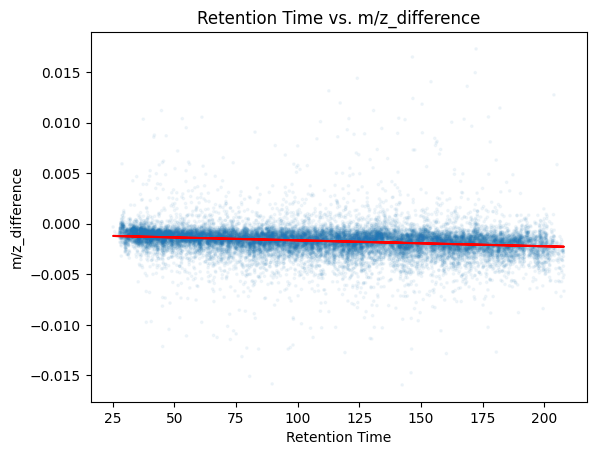

Slope: -5.827636252981006e-06
Intercept: -0.0010609838109436024


In [24]:
import numpy as np
# Scatter plot
plt.scatter(df_error0['rt'], df_error0['m/z_difference'], marker='o', linestyle='', alpha=0.05, s=3)
plt.xlabel('Retention Time')
plt.ylabel('m/z_difference')
plt.title('Retention Time vs. m/z_difference')

# Fit a line
x = df_error0['rt']
y = df_error0['m/z_difference']
coefficients = np.polyfit(x, y, 1)
polynomial = np.poly1d(coefficients)
plt.plot(x, polynomial(x), color='red')

plt.show()

# Get the coefficients
slope, intercept = coefficients
print("Slope:", slope)
print("Intercept:", intercept)

In [25]:
df_error0['adjusted_m/z_difference'] = df_error0['m/z_difference'] - (df_error0['rt'] * slope + intercept)
df_error0.head(5)

/tmp/ipykernel_2962898/1294505215.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_error0['adjusted_m/z_difference'] = df_error0['m/z_difference'] - (df_error0['rt'] * slope + intercept)


,peptide,proteins,num_proteins,filename,scannr,rank,label,expmass,calcmass,charge,peptide_len,missed_cleavages,isotope_error,precursor_ppm,fragment_ppm,hyperscore,delta_next,delta_best,rt,aligned_rt,predicted_rt,delta_rt_model,matched_peaks,longest_b,longest_y,longest_y_pct,matched_intensity_pct,scored_candidates,poisson,sage_discriminant_score,posterior_error,spectrum_q,peptide_q,protein_q,ms1_intensity,ms2_intensity,exp_m/z,calc_m/z,m/z_difference,adjusted_m/z_difference
0,AMADPEVQQIMSDPAM[+15.9949]R,tr|V9HW72|V9HW72_HUMAN,1,b1948_293T_proteinID_12B_QE3_122212.mzML,controllerType=0 controllerNumber=1 scan=52137,1,1,1904.8496,1904.8430,2,17,0,0.0,3.460540,2.086644,74.331097,19.641480,0.0,142.37796,0.684509,0.598838,0.085672,24,12,12,0.705882,38.319496,12,-11.079516,4.004227,-324.0,0.002681,0.004826,0.008468,324433760.0,18802004.0,952.42480,952.42150,-0.00330,-0.001409
1,AM[+15.9949]ADPEVQQIMSDPAM[+15.9949]R,tr|V9HW72|V9HW72_HUMAN,1,b1948_293T_proteinID_12B_QE3_122212.mzML,controllerType=0 controllerNumber=1 scan=43192,1,1,1920.8435,1920.8379,2,17,0,0.0,2.923321,2.441208,69.276393,17.127591,0.0,122.47926,0.588843,0.603447,0.014604,23,10,12,0.705882,51.741932,12,-9.318639,3.931856,-324.0,0.002681,0.004826,0.008468,58996220.0,4950993.5,960.42175,960.41895,-0.00280,-0.001025
2,VGNGFEEGTTQGPLINEK,tr|X5DNC0|X5DNC0_HUMAN,1,b1948_293T_proteinID_12B_QE3_122212.mzML,controllerType=0 controllerNumber=1 scan=39017,1,1,1888.9207,1888.9167,2,18,0,0.0,2.067982,2.366664,73.226700,46.688128,0.0,113.33001,0.544856,0.546196,0.001340,24,11,12,0.666667,50.676030,24,-17.006086,3.777303,-324.0,0.002681,0.004826,0.008468,317890100.0,15707142.0,944.46035,944.45835,-0.00200,-0.000279
3,SC[+57.0214]DDEDWQPGLVTPR,tr|V9GYX6|V9GYX6_HUMAN,1,b1948_293T_proteinID_12B_QE3_122212.mzML,controllerType=0 controllerNumber=1 scan=46485,1,1,1773.7666,1773.7627,2,15,0,0.0,2.202237,2.743206,51.644550,51.644550,0.0,129.73146,0.623709,0.560582,0.063127,17,5,12,0.800000,73.020770,1,-1.760110,3.655011,-324.0,0.002681,0.004826,0.008468,9428209.0,766222.0,886.88330,886.88135,-0.00195,-0.000133
4,AMADPEVQQIMSDPAM[+15.9949]R,tr|V9HW72|V9HW72_HUMAN,1,b1948_293T_proteinID_12B_QE3_122212.mzML,controllerType=0 controllerNumber=1 scan=52426,1,1,1904.8522,1904.8430,2,17,0,0.0,4.806302,1.754573,63.904430,12.263916,0.0,143.05637,0.687771,0.598838,0.088933,21,9,12,0.705882,31.141436,10,-8.294859,3.538570,-324.0,0.002681,0.004826,0.008468,76771940.0,4060421.5,952.42610,952.42150,-0.00460,-0.002705


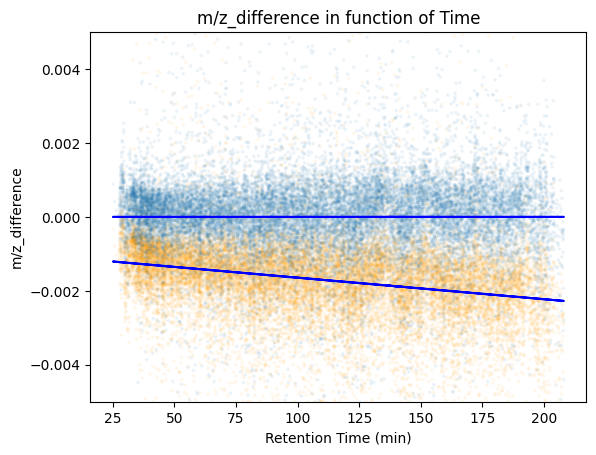

In [26]:
plt.scatter(df_error0['rt'], df_error0['m/z_difference'], marker='o', linestyle='', alpha=0.05, s=3, color = "orange")
plt.scatter(df_error0['rt'], df_error0['adjusted_m/z_difference'], marker='o', linestyle='', alpha=0.05, s=3)
plt.ylim(-0.005, 0.005)
plt.xlabel('Retention Time (min)')
plt.ylabel('m/z_difference')
plt.title('m/z_difference in function of Time')

# Fit a line
x = df_error0['rt']
y = df_error0['m/z_difference']
coefficients = np.polyfit(x, y, 1)
polynomial = np.poly1d(coefficients)
plt.plot(x, polynomial(x), color='blue')

x = df_error0['rt']
y = df_error0['adjusted_m/z_difference']
coefficients = np.polyfit(x, y, 1)
polynomial = np.poly1d(coefficients)
plt.plot(x, polynomial(x), color='blue')


plt.show()

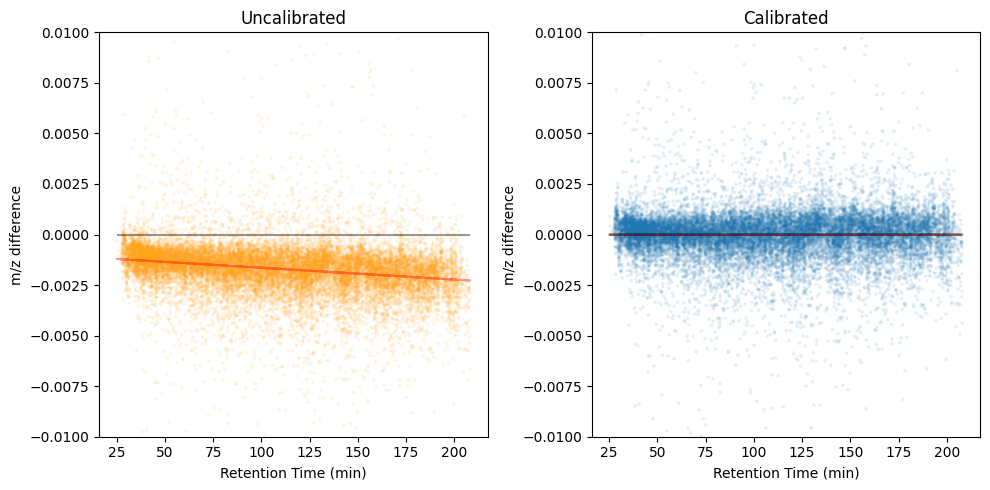

In [27]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# First subplot
axs[0].scatter(df_error0['rt'], df_error0['m/z_difference'], marker='o', linestyle='', alpha=0.075, s=3, color = "#FFA519")
x = df_error0['rt']
y = df_error0['m/z_difference']
coefficients = np.polyfit(x, y, 1)
polynomial = np.poly1d(coefficients)
axs[0].plot(x, polynomial(x), color='red', alpha=0.4)

# Get the x-range of the data in the second subplot
x_range = df_error0['rt']

# Add horizontal line at y=0 with the same x-range as the data in the second subplot
axs[0].hlines(0, min(x_range), max(x_range), colors='black', alpha=0.4)

axs[0].set_ylim(-0.01, 0.01)
axs[0].set_xlabel('Retention Time (min)')
axs[0].set_ylabel('m/z difference')
axs[0].set_title('Uncalibrated')

# Second subplot
axs[1].scatter(df_error0['rt'], df_error0['adjusted_m/z_difference'], marker='o', linestyle='', alpha=0.075, s=3)
x = df_error0['rt']
y = df_error0['adjusted_m/z_difference']
coefficients = np.polyfit(x, y, 1)
polynomial = np.poly1d(coefficients)

axs[1].hlines(0, min(x_range), max(x_range), colors='red', alpha=0.4)

axs[1].plot(x, polynomial(x), color='black', alpha=0.4)
axs[1].set_ylim(-0.01, 0.01)
axs[1].set_xlabel('Retention Time (min)')
axs[1].set_ylabel('m/z difference')
axs[1].set_title('Calibrated')

plt.tight_layout()
plt.show()

In [28]:
df_error0['adjusted_exp_m/z'] = df_error0['exp_m/z'] + df_error0['adjusted_m/z_difference']
df_error0.head(5)

/tmp/ipykernel_2962898/4151232261.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_error0['adjusted_exp_m/z'] = df_error0['exp_m/z'] + df_error0['adjusted_m/z_difference']


,peptide,proteins,num_proteins,filename,scannr,rank,label,expmass,calcmass,charge,peptide_len,missed_cleavages,isotope_error,precursor_ppm,fragment_ppm,hyperscore,delta_next,delta_best,rt,aligned_rt,predicted_rt,delta_rt_model,matched_peaks,longest_b,longest_y,longest_y_pct,matched_intensity_pct,scored_candidates,poisson,sage_discriminant_score,posterior_error,spectrum_q,peptide_q,protein_q,ms1_intensity,ms2_intensity,exp_m/z,calc_m/z,m/z_difference,adjusted_m/z_difference,adjusted_exp_m/z
0,AMADPEVQQIMSDPAM[+15.9949]R,tr|V9HW72|V9HW72_HUMAN,1,b1948_293T_proteinID_12B_QE3_122212.mzML,controllerType=0 controllerNumber=1 scan=52137,1,1,1904.8496,1904.8430,2,17,0,0.0,3.460540,2.086644,74.331097,19.641480,0.0,142.37796,0.684509,0.598838,0.085672,24,12,12,0.705882,38.319496,12,-11.079516,4.004227,-324.0,0.002681,0.004826,0.008468,324433760.0,18802004.0,952.42480,952.42150,-0.00330,-0.001409,952.423391
1,AM[+15.9949]ADPEVQQIMSDPAM[+15.9949]R,tr|V9HW72|V9HW72_HUMAN,1,b1948_293T_proteinID_12B_QE3_122212.mzML,controllerType=0 controllerNumber=1 scan=43192,1,1,1920.8435,1920.8379,2,17,0,0.0,2.923321,2.441208,69.276393,17.127591,0.0,122.47926,0.588843,0.603447,0.014604,23,10,12,0.705882,51.741932,12,-9.318639,3.931856,-324.0,0.002681,0.004826,0.008468,58996220.0,4950993.5,960.42175,960.41895,-0.00280,-0.001025,960.420725
2,VGNGFEEGTTQGPLINEK,tr|X5DNC0|X5DNC0_HUMAN,1,b1948_293T_proteinID_12B_QE3_122212.mzML,controllerType=0 controllerNumber=1 scan=39017,1,1,1888.9207,1888.9167,2,18,0,0.0,2.067982,2.366664,73.226700,46.688128,0.0,113.33001,0.544856,0.546196,0.001340,24,11,12,0.666667,50.676030,24,-17.006086,3.777303,-324.0,0.002681,0.004826,0.008468,317890100.0,15707142.0,944.46035,944.45835,-0.00200,-0.000279,944.460071
3,SC[+57.0214]DDEDWQPGLVTPR,tr|V9GYX6|V9GYX6_HUMAN,1,b1948_293T_proteinID_12B_QE3_122212.mzML,controllerType=0 controllerNumber=1 scan=46485,1,1,1773.7666,1773.7627,2,15,0,0.0,2.202237,2.743206,51.644550,51.644550,0.0,129.73146,0.623709,0.560582,0.063127,17,5,12,0.800000,73.020770,1,-1.760110,3.655011,-324.0,0.002681,0.004826,0.008468,9428209.0,766222.0,886.88330,886.88135,-0.00195,-0.000133,886.883167
4,AMADPEVQQIMSDPAM[+15.9949]R,tr|V9HW72|V9HW72_HUMAN,1,b1948_293T_proteinID_12B_QE3_122212.mzML,controllerType=0 controllerNumber=1 scan=52426,1,1,1904.8522,1904.8430,2,17,0,0.0,4.806302,1.754573,63.904430,12.263916,0.0,143.05637,0.687771,0.598838,0.088933,21,9,12,0.705882,31.141436,10,-8.294859,3.538570,-324.0,0.002681,0.004826,0.008468,76771940.0,4060421.5,952.42610,952.42150,-0.00460,-0.002705,952.423395


In [29]:
import pyteomics
from pyteomics import mzml
mzsL = []
intensitiesL = []

# Open the mzML file
with mzml.read('b1948_293T_proteinID_12B_QE3_122212.mzML') as reader:
    for spectrum in reader:
        # Access spectrum data
        mzs = spectrum['m/z array']
        intensities = spectrum['intensity array']
        # Process the data as needed
        mzsL.append(mzs)
        intensitiesL.append(intensities)

In [30]:
from pyteomics import mzml

mzml_filename = 'b1948_293T_proteinID_12B_QE3_122212.mzML'

# Your slope and intercept from the linear regression
slope = -5.827636252981006e-06
intercept = -0.0010609838109436024

# Read the mzML file
with mzml.read(mzml_filename) as reader:
    for spectrum in reader:
        # Extract the scan number from the 'id' attribute
        scan_number = spectrum['id'].split('=')[-1]
        
        # Check if the spectrum is MS2
        if spectrum['ms level'] == 2:
            # Get the retention time and m/z values
            retention_time = spectrum['scanList']['scan'][0]['scan start time']
            mz_values = spectrum['m/z array']
            
            # Apply the calibration function to the m/z values
            calibrated_mz_values = mz_values - (retention_time * slope + intercept)
            
            #print(f'Scan number {scan_number} has retention time {retention_time} and calibrated m/z values {calibrated_mz_values}')
            

In [31]:
from pyteomics import mzml, auxiliary
from psims.mzml.writer import MzMLWriter

data = list(mzml.read('b1948_293T_proteinID_12B_QE3_122212.mzML'))



In [32]:
data[0]

{'id': 'controllerType=0 controllerNumber=1 scan=1',
 'index': 0,
 'defaultArrayLength': 1458,
 'scanList': {'count': 1,
  'scan': [{'instrumentConfigurationRef': 'IC1',
    'scanWindowList': {'count': 1,
     'scanWindow': [{'scan window lower limit': 300.0 m/z,
       'scan window upper limit': 1500.0 m/z}]},
    'scan start time': 15.001921 minute,
    'filter string': 'FTMS + p NSI Full ms [300.00-1500.00]',
    'ion injection time': 52.613 millisecond}],
  'no combination': ''},
 'ms level': 1,
 'MS1 spectrum': '',
 'positive scan': '',
 'total ion current': 15917656.0,
 'centroid spectrum': '',
 'base peak m/z': 371.106719970703 m/z,
 'base peak intensity': 735967.75 number of detector counts,
 'lowest observed m/z': 300.541168212891 m/z,
 'highest observed m/z': 1220.67431640625 m/z,
 'count': 2,
 'm/z array': array([ 300.54116821,  300.9090271 ,  300.92541504, ..., 1089.73132324,
        1096.76940918, 1220.67431641]),
 'intensity array': array([1399.19921875, 1129.05273438, 43

In [33]:
def calibrate0(spectrum):
    retention_time = spectrum['scanList']['scan'][0]['scan start time']
    mz_values = spectrum['m/z array']
        
    # Apply the calibration function to the m/z values
    calibrated_mz_values = mz_values - (retention_time * slope + intercept)
    
    # Replace the original m/z values with the calibrated ones
    spectrum['m/z array'] = calibrated_mz_values   
    return spectrum

In [34]:
calibrate0(data[0])

{'id': 'controllerType=0 controllerNumber=1 scan=1',
 'index': 0,
 'defaultArrayLength': 1458,
 'scanList': {'count': 1,
  'scan': [{'instrumentConfigurationRef': 'IC1',
    'scanWindowList': {'count': 1,
     'scanWindow': [{'scan window lower limit': 300.0 m/z,
       'scan window upper limit': 1500.0 m/z}]},
    'scan start time': 15.001921 minute,
    'filter string': 'FTMS + p NSI Full ms [300.00-1500.00]',
    'ion injection time': 52.613 millisecond}],
  'no combination': ''},
 'ms level': 1,
 'MS1 spectrum': '',
 'positive scan': '',
 'total ion current': 15917656.0,
 'centroid spectrum': '',
 'base peak m/z': 371.106719970703 m/z,
 'base peak intensity': 735967.75 number of detector counts,
 'lowest observed m/z': 300.541168212891 m/z,
 'highest observed m/z': 1220.67431640625 m/z,
 'count': 2,
 'm/z array': array([ 300.54231662,  300.91017551,  300.92656345, ..., 1089.73247165,
        1096.77055759, 1220.67546482]),
 'intensity array': array([1399.19921875, 1129.05273438, 43

In [35]:
from psims.transform.mzml import MzMLTransformer, cvstr

def transform_drop_ms2(spectrum):
    if spectrum['ms level'] > 1:
        return None
    return spectrum

with open("b1948_293T_proteinID_12B_QE3_122212.mzML", 'rb') as in_stream, open("ms1_only_b1948_293T_proteinID_12B_QE3_122212.mzML", 'wb') as out_stream:
    MzMLTransformer(in_stream, out_stream, transform_drop_ms2).write()


Handled 0 spectra
Handled 1000 spectra
Handled 2000 spectra
Handled 3000 spectra
Handled 4000 spectra
Handled 9000 spectra
Handled 10000 spectra
Handled 12000 spectra
Handled 13000 spectra
Handled 15000 spectra
Handled 20000 spectra
Handled 29000 spectra
Handled 35000 spectra
Handled 36000 spectra
Handled 49000 spectra
Handled 52000 spectra
Handled 53000 spectra
Handled 57000 spectra
Handled 58000 spectra
Handled 59000 spectra
Handled 63000 spectra
Handled 68000 spectra
Handled 72000 spectra
Handled 75000 spectra
Handled 77000 spectra
Handled 77337 spectra


In [36]:
test = list(mzml.read('ms1_only_b1948_293T_proteinID_12B_QE3_122212.mzML'))

In [37]:
len(test)

22150

In [38]:
data[0]

{'id': 'controllerType=0 controllerNumber=1 scan=1',
 'index': 0,
 'defaultArrayLength': 1458,
 'scanList': {'count': 1,
  'scan': [{'instrumentConfigurationRef': 'IC1',
    'scanWindowList': {'count': 1,
     'scanWindow': [{'scan window lower limit': 300.0 m/z,
       'scan window upper limit': 1500.0 m/z}]},
    'scan start time': 15.001921 minute,
    'filter string': 'FTMS + p NSI Full ms [300.00-1500.00]',
    'ion injection time': 52.613 millisecond}],
  'no combination': ''},
 'ms level': 1,
 'MS1 spectrum': '',
 'positive scan': '',
 'total ion current': 15917656.0,
 'centroid spectrum': '',
 'base peak m/z': 371.106719970703 m/z,
 'base peak intensity': 735967.75 number of detector counts,
 'lowest observed m/z': 300.541168212891 m/z,
 'highest observed m/z': 1220.67431640625 m/z,
 'count': 2,
 'm/z array': array([ 300.54231662,  300.91017551,  300.92656345, ..., 1089.73247165,
        1096.77055759, 1220.67546482]),
 'intensity array': array([1399.19921875, 1129.05273438, 43

In [39]:
from psims.transform.mzml import MzMLTransformer, cvstr

def calibrate_ms2(spectrum):
    if spectrum['ms level'] > 1:
        retention_time = spectrum['scanList']['scan'][0]['scan start time']
        mz_values = spectrum['m/z array']
            
        # Apply the calibration function to the m/z values
        calibrated_mz_values = mz_values + (retention_time * slope + intercept)
        
        # Replace the original m/z values with the calibrated ones
        spectrum['m/z array'] = calibrated_mz_values   
    return spectrum

with open("b1948_293T_proteinID_12B_QE3_122212.mzML", 'rb') as in_stream, open("Calibrated_TEST_FunctionPlus_b1948_293T_proteinID_12B_QE3_122212.mzML", 'wb') as out_stream:
    MzMLTransformer(in_stream, out_stream, calibrate_ms2).write()

Handled 0 spectra
Handled 1000 spectra
Handled 2000 spectra
Handled 3000 spectra
Handled 4000 spectra
Handled 5000 spectra
Handled 6000 spectra
Handled 7000 spectra
Handled 8000 spectra
Handled 9000 spectra
Handled 10000 spectra
Handled 11000 spectra
Handled 12000 spectra
Handled 13000 spectra
Handled 14000 spectra
Handled 15000 spectra
Handled 16000 spectra
Handled 17000 spectra
Handled 18000 spectra
Handled 19000 spectra
Handled 20000 spectra
Handled 21000 spectra
Handled 22000 spectra
Handled 23000 spectra
Handled 24000 spectra
Handled 25000 spectra
Handled 26000 spectra
Handled 27000 spectra
Handled 28000 spectra
Handled 29000 spectra
Handled 30000 spectra
Handled 31000 spectra
Handled 32000 spectra
Handled 33000 spectra
Handled 34000 spectra
Handled 35000 spectra
Handled 36000 spectra
Handled 37000 spectra
Handled 38000 spectra
Handled 39000 spectra
Handled 40000 spectra
Handled 41000 spectra
Handled 42000 spectra
Handled 43000 spectra
Handled 44000 spectra
Handled 45000 spectra
H

In [40]:
data_calib = list(mzml.read('Calibrated_TEST_FunctionPlus_b1948_293T_proteinID_12B_QE3_122212.mzML'))

In [41]:
len(data_calib)

77338